#Classificação de músicas do Spotify
##Classificação de músicas do Spotify
Este notebook utiliza um conjunto de dados contendo faixas do Spotify classificadas em 125 gêneros diferentes. Cada faixa apresenta diversas características de áudio que podem ser exploradas em diferentes tipos de análises.

## Possíveis usos da base de dados:
- Construção de sistemas de recomendação com base em preferências do usuário;
- Modelos de classificação baseados em atributos de áudio e gêneros;
- Outras aplicações criativas que envolvam análise de músicas.

## Objetivo do Projeto

Nosso objetivo é construir um modelo preditivo capaz de classificar músicas entre agitadas e lentas, com base em suas características de áudio.

Utilizaremos a base de dados **"Spotify Tracks Dataset"**, disponível no Kaggle:  
🔗 [Acessar o dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.shape

(114000, 21)

## Criando a Variável Alvo (Target)

A coluna `valence` representa, em uma escala de 0.0 a 1.0, o nível de positividade emocional de uma música.  
- **Alta valência**: músicas com clima positivo (felizes, alegres, eufóricas);  
- **Baixa valência**: músicas mais negativas (tristes, melancólicas, irritadas).

Vamos utilizar essa coluna como critério para criar a variável alvo do nosso modelo, definindo se uma música é **agitada** ou **lenta**.

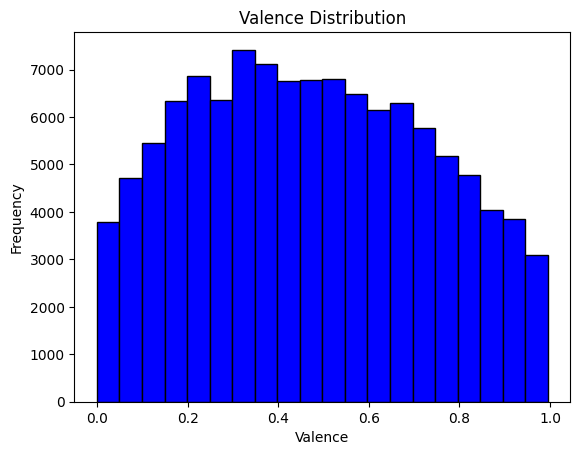

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['valence'], bins=20, color='blue', edgecolor='black')
plt.title('Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['valence'].describe()

,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


In [8]:
def categorizar_valence(row):
  if row['valence'] > 0.5:
    return 'Agitada'
  else:
    return 'Lenta'

df['target'] = df.apply(categorizar_valence, axis=1)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Lenta


#Feature Engineering
Como próximo passo, vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas.



In [9]:
df_musica = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Lenta


#Tratando os dados categóricos
LabelEncoder: Essa classe é utilizada para codificar rótulos de classes em números inteiros. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.

In [10]:
def label_encoder_dataframe(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder

  le = LabelEncoder()
  for column in columns_to_encode:
    if column in df.columns:
      df[column] = le.fit_transform(df[column])
    else:
      print(f"A lista possui colunas que não existem no Dataframe")
  return df

colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
df_musica = label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


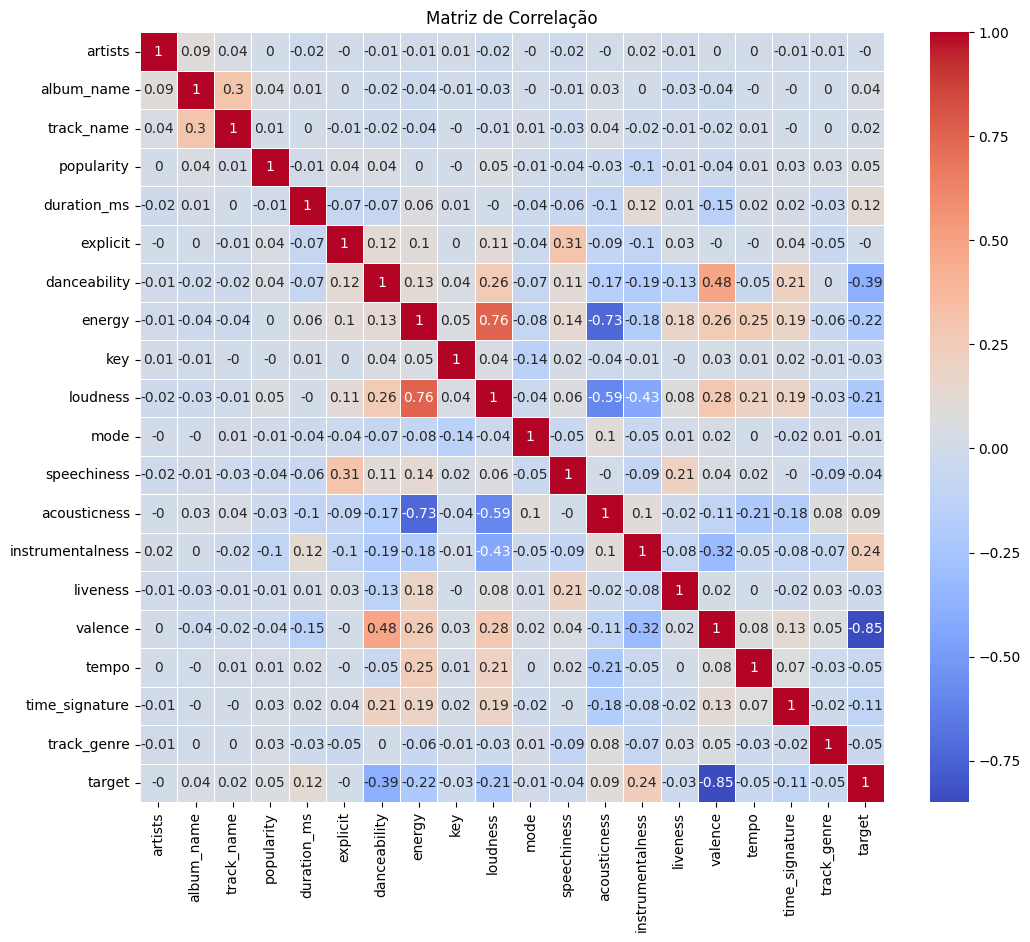

In [11]:
import seaborn as sns

correlation_matrix = df_musica.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Verificando o Balanceamento da Variável Alvo

Antes de treinar os modelos, é importante verificar se a variável alvo está balanceada — ou seja, se há uma distribuição semelhante entre as classes de músicas agitadas e lentas. Desequilíbrios podem afetar a performance do modelo, especialmente em classificadores binários.


In [12]:
round(df_musica['target'].value_counts(normalize = True)*100,2)

,proportion
target,
1,54.37
0,45.63


In [13]:
set(df['target'])

{'Agitada', 'Lenta'}

In [14]:
set(df_musica['target'])

{0, 1}

## Divisão dos Dados em Conjuntos de Treino e Teste

Separamos os dados em dois conjuntos:
- **Treinamento (train)**: para ajustar os parâmetros dos modelos;
- **Teste (test)**: para avaliar o desempenho do modelo em dados nunca vistos.

Essa divisão é fundamental para medir a capacidade de generalização do modelo.

In [15]:
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [16]:
from re import X
from sklearn.model_selection import train_test_split

#X = df_musica.drop('target', axis=1)
X = df_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=7)

In [17]:
print(X_train.shape)
print(X_test.shape)

(91200, 9)
(22800, 9)


## Normalização dos Dados

Alguns algoritmos de Machine Learning são sensíveis à escala dos dados. Por isso, aplicamos a técnica de **normalização**, utilizando o `MinMaxScaler`, que transforma os valores numéricos para o intervalo entre 0 e 1.

🔎 **Importante**:  
A normalização deve ser aplicada **após** a divisão dos dados em treino e teste.  
Se fizermos isso antes da divisão, podemos acidentalmente incluir informações do conjunto de teste no conjunto de treino — um fenômeno conhecido como **data leakage** (vazamento de dados), que prejudica a avaliação real do modelo.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_escalonado = scaler.fit_transform(X_train)
X_test_escalonado = scaler.transform(X_test)

## Função para Treinamento e Avaliação de Modelos

Vamos definir uma função que facilitará o processo de:
- Treinar um modelo de Machine Learning;
- Gerar previsões;
- Avaliar o desempenho com as principais métricas (acurácia, precisão, recall e F1-score).

Isso nos permitirá testar diferentes algoritmos de forma mais prática e padronizada.

In [28]:
def roda_modelo(modelo):
  from sklearn.metrics import roc_curve, roc_auc_score, classification_report

  modelo.fit(X_train_escalonado, y_train)

  prob_predic = modelo.predict_proba(X_test_escalonado)
  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f'AUC: {auc}')

  predicao = modelo.predict(X_test_escalonado)
  print("\n Classification Report")
  print(classification_report(y_test, predicao))

  print("\n Roc Curve \n")
  y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

  auc = roc_auc_score(y_test, y_pred_probs)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve(AUC = {auc:.2f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('Taxa de Falso Positivo')
  plt.ylabel('Taxa de Verdadeiro Positivo')
  plt.title('Curva roc')
  plt.legend(loc = 'lower right')
  plt.show()

  y_pred = (y_pred_probs >= 0.5).astype(int)

## Regressão Logística

A Regressão Logística é um modelo estatístico utilizado para problemas de classificação binária.  
Ela utiliza uma função logística (sigmoide) para transformar os valores das variáveis independentes em uma **probabilidade** entre 0 e 1.

Com base nessa probabilidade, o modelo decide se a entrada pertence à classe "música agitada" ou "música lenta".


AUC: 0.7962019382303666

 Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


 Roc Curve 



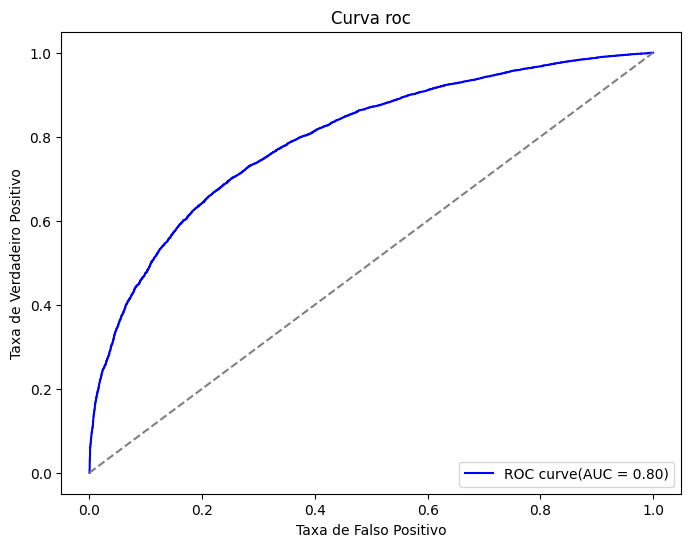

In [29]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

## KNN (K-Nearest Neighbors)

O algoritmo KNN classifica novos dados com base na proximidade deles em relação aos dados de treinamento.  
Ele funciona assim:
- Para um novo ponto, identifica os **K vizinhos mais próximos**;
- A classe mais comum entre esses vizinhos é atribuída ao novo ponto.

É um método simples e eficaz, mas pode ser sensível à escolha do valor de K e ao balanceamento dos dados.


AUC: 0.8117874424738845

 Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10403
           1       0.77      0.78      0.78     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


 Roc Curve 



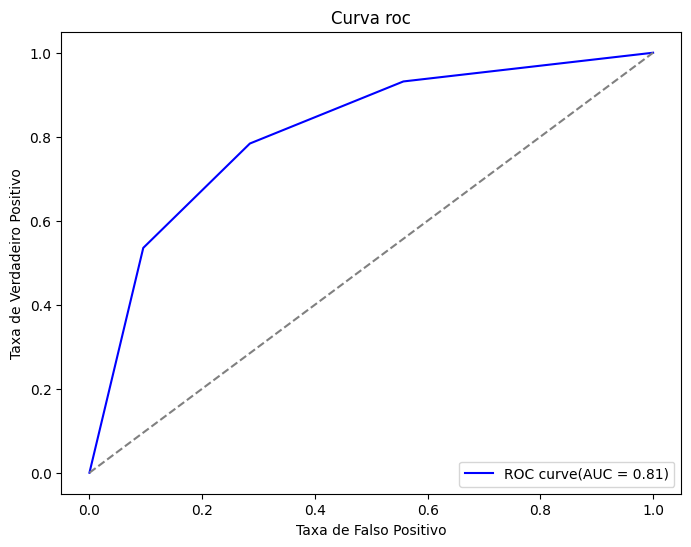

In [30]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

## Random Forest

O **Random Forest** é um algoritmo de aprendizado por conjunto (ensemble learning) que constrói várias árvores de decisão e combina os resultados para melhorar a precisão e reduzir overfitting.

Como funciona:
- Cada árvore é treinada com uma amostra aleatória do conjunto de dados (bootstrap);
- A predição final é feita com base na **maioria dos votos** entre as árvores da floresta.

É um modelo robusto, versátil e com bom desempenho em várias tarefas de classificação.


AUC: 0.8297282575838152

 Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.75      0.75      0.75     22800


 Roc Curve 



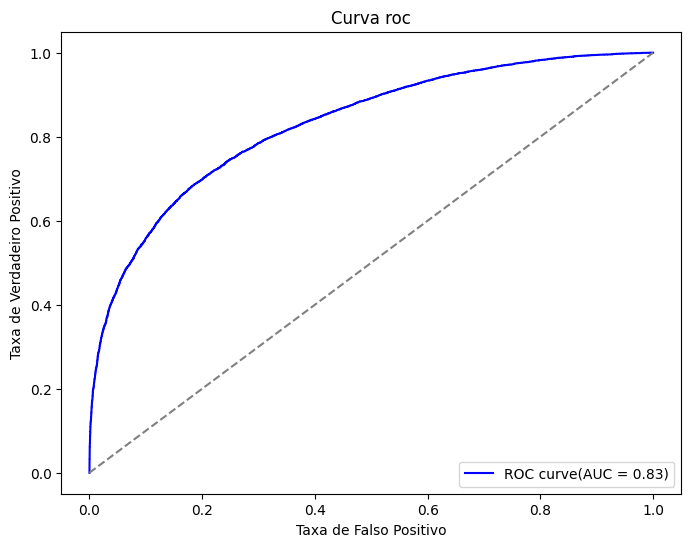

In [31]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators= 100)
roda_modelo(modelo_random_forest)

## Otimizando Hiperparâmetros com Grid Search

Agora vamos utilizar o **GridSearchCV** para testar combinações de hiperparâmetros e encontrar aquela que oferece o melhor desempenho ao modelo.

⏳ *Atenção:* Esse processo pode ser demorado, já que testa várias combinações diferentes de forma exaustiva.


In [32]:
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)

Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 300}


### Hiperparâmetros Otimizados

Os melhores hiperparâmetros encontrados foram:
```python
{'max_depth': 15, 'n_estimators': 300}


AUC: 0.9062493149841342

 Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     10403
           1       0.84      0.84      0.84     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


 Roc Curve 



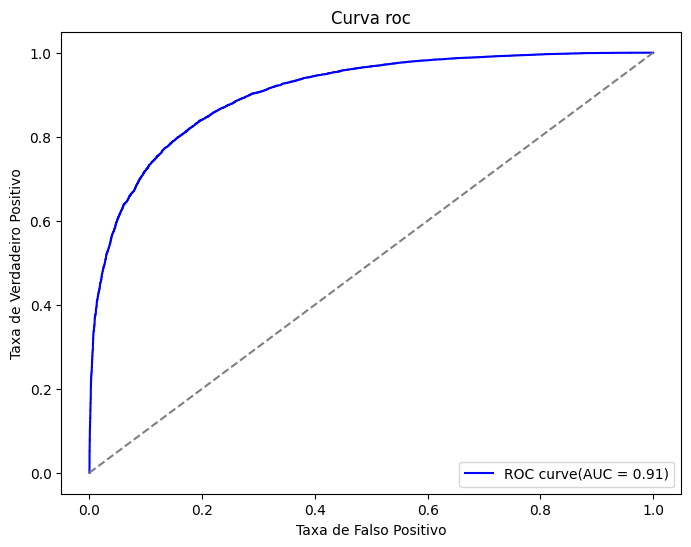

In [33]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators= 300)
roda_modelo(modelo_random_forest_gs)

## Avaliando o Modelo Otimizado

Com os hiperparâmetros ajustados, vamos reavaliar o modelo para verificar se houve melhora no desempenho.


In [34]:
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta
